In [1]:
import numpy as np
#!pip install cupy
#import cupy as np 
import matplotlib.pyplot as plt

In [2]:
def zeroth_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a = (1/z1) * ((1 - alpha) * L + alpha * R)
    c20a = (-z1/z2) * c10a
    c10b = (1/z1) * ((1 - beta) * L + beta * R)
    c20b = (-z1/z2) * c10b
    phi0a = V * (np.log(((1 - alpha) * L + alpha * R)) - np.log(R)) / (np.log(L) - np.log(R))
    phi0b = V * (np.log(((1 - beta)  * L + beta * R)) - np.log(R)) / (np.log(L) - np.log(R))
    y0 = ((1.0 / ((z1 - z2) * (L - R))) * np.log(((1 - alpha) * L + alpha * R) / ((1 - beta) * L + beta * R)))
    J10 = ((L - R) / (z1 * (np.log(L) - np.log(R)))) * (z1 * V + np.log(L) - np.log(R))
    J20 = ((R - L) / (z2 * (np.log(L) - np.log(R)))) * (z2 * V + np.log(L) - np.log(R))
    return c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20

In [3]:
def first_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a = (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21a = (z1 * alpha * (phi0b - phi0a) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c11b = (z2 * (1 - beta) * (phi0a - phi0b) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21b = (z1 * (1 - beta) * (phi0a - phi0b) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c1L  = L / z1
    c1R  = R / z1
    T0   =   J10 +  J20

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    lambda_val = V / (np.log(L) - np.log(R))
    phi1a = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1L) - np.log(c10a))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10a)) + (lambda_val * ((z2 * alpha * (phi0b - phi0a)) / ((z1 - z2) * c10a) ) )
    phi1b = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1R) - np.log(c10b))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10b)) + (lambda_val * ((z2 * (1 - beta) * (phi0a - phi0b)) / ((z1 - z2) * c10b) ) )
    y1 = (((1 - beta) * c1L + alpha * c1R) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * c10a * c10b) \
           + ((np.log(c10a) - np.log(c10b)) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * (c1L - c1R)) \
            - (((z2 * J10 + z1 * J20) * (c10a - c10b)) / (z1 ** 2 * z2 * (z1 - z2) * T0 ** 2 * c10a * c10b))
    J11 = ( (A * (z2 * (1 - B) * V + np.log(L) - np.log(R))) / ((z1 - z2) * (np.log(L) - np.log(R))**2) ) * (z1 * V + np.log(L) - np.log(R))
    J21 = ( (A * (z1 * (1 - B) * V + np.log(L) - np.log(R))) / ((z2 - z1) * (np.log(L) - np.log(R))**2) ) * (z2 * V + np.log(L) - np.log(R))


    return c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21

In [4]:
def calculate_voltage_ranges(L, R):
    alpha = 1/3
    beta = 2/3
    z1 = 1
    z2 = -1

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    Vq1 = (np.log(R) - np.log(L)) / (z2 * (1 - B))
    Vq2 = (np.log(R) - np.log(L)) / (z1 * (1 - B))

    Vqmin = np.min([Vq1, Vq2])
    Vqmax = np.max([Vq1, Vq2])

    V1_range = np.linspace(Vqmin-80, Vqmin, 200)
    V2_range = np.linspace(Vqmin, Vqmax, 200)
    V3_range = np.linspace(Vqmax, Vqmax+80, 200)

    return alpha, beta, z1, z2, V1_range, V2_range, V3_range



In [5]:
 # Define the second order terms
def second_order_terms(V, alpha, beta, L, R, z1, z2):
     # Constants
     c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
     c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V, alpha, beta, L, R, z1, z2)
     H1 = 1.0
     phiL = V
     phiR = 0.0
     c1L  = L / z1
     c1R  = R / z1
     T0   = J10 +  J20
     T1   = J11 +  J21
     I1   = z1*J11 + z2*J21

     # Intermediate calculations
     A1 = -z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     B1 = z1 * (c10b - c1R) / ((1 - beta) * H1 * (np.log(c10b) - np.log(c1R)))
     A2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phiL - phi0a) / (np.log(c1L) - np.log(c10a))
           - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a)))
     B2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phi0b - phiR) / (np.log(c10b) - np.log(c1R))
           - (phi0b - phiR) * (c10b - c1R) / ((np.log(c10b) - np.log(c1R))**2 * c10b)))
     # Constants
     C1L = z1**2 * c11a + z2**2 * c21a
     C1R = z1**2 * c11b + z2**2 * c21b
     C2 = (z1 + z2) * (c10b**2 - c10a**2) / (12 * (z1 * (z1 - z2) * c10a * c10b)**2)
     I1_term = I1 * y1

     #Compute C:
     # First term
     C = -(C1L / (2 * z1 * (z1 - z2) * c10a)**2) + (C1R / (2 * (z1 * (z1 - z2) * c10b)**2)) + C2
     # Second term
     term2 = ((z1 - z2) * (L - R) * V * y1) / (H1 * (np.log(L) - np.log(R)) * c10a)
     term2 -= (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (c10a * (phi0a - phi0b) / (H1 * T0)) - (1 / (z1 - z2))
     # Third term
     term3 = (0.5 * z2 * V / (z1 * (z1 - z2)**2 * (np.log(L) - np.log(R)))) * (1 / c10a**2 - 1 / c10b**2)
     # Fourth term
     term4 = (z1 * z2 * (phi1a - phi1b) * V / (np.log(L) - np.log(R)))
     term4 *= (1 / (z1 * (z1 - z2))) * (alpha / c10a + (1 - beta) / c10b) + y0 / H1
     # Fifth term
     term5 = (0.5 * z1**2 * z2**2 * V * (T0 * y1 + T1 * y0)**2 / (np.log(L) - np.log(R)))
     # Sixth term
     term6 = (z1 * z2 * V * (phi0a - phi0b) * y0 / (H1 * c10a * (np.log(L) - np.log(R))))
     term6 *= z2 * alpha * (phi0b - phi0a) / (z1 - z2) - 1 / (z1 - z2)
     # Seventh term
     term7 = (J11 * V / (z1 * T0 * (np.log(L) - np.log(R)))) * (1 / c10b - 1 / c10a)
     # Eighth term
     term8 = (J10 * (phi0a - phi0b) * V / (z1 * T0**2 * H1 * (np.log(L) - np.log(R)))) * (1 / c10b - 1 / c10a)
     # Combine all terms
     C += term2 + term3 - term4 - term5 + term6 + term7 + term8

     # Calculate c12a, c22a, c12b, c22b
     c12a = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10a)) -
             ((phi0a - phi0b) * alpha * z2) / (z1 - z2))
     c22a = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10a) +
             ((phi0a - phi0b) * alpha * z1) / (z1 - z2))
     c12b = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10b)) +
             ((phi0a - phi0b) * (1 - beta) * z2) / (z1 - z2))
     c22b = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10b) -
             ((phi0a - phi0b) * (1 - beta) * z1) / (z1 - z2))

     # Calculate phi2a, phi2b
     phi2a = ((B1 * C - (z1 - z2) * y0 * B1 * A2 - z2 * y0 * B1 * (phi1b - phi1a) / H1 +
               B2 - A2) / (A1 - B1 + (z1 - z2) * y0 * A1 * B1))
     phi2b = ((1 - (z1 - z2) * y0 * A1) * phi2a + C - (z1 - z2) * y0 * A2 - z2 * y0 * (phi1b - phi1a) / H1)


     y2 = (y0 * (phi1a - phi1b) / (H1 * T0) - (y1 / c10a) * (z2 * alpha * (phi0b - phi0a) / (z1 - z2) -
       (c10a * (phi0a - phi0b) / (H1 * T0)) - 1 / (z1 - z2)) +
       (0.5 / (z1**2 * (z1 - z2)**2 * T0)) * (1 / c10a**2 - 1 / c10b**2) +
       ((phi1a - phi1b) / (z1 * (z1 - z2) * T0)) * (alpha / c10a + (1 - beta) / c10b) -
       (z1 * z2 / (2 * T0)) * (T0 * y1 + T1 * y0)**2 +
       (((phi0a - phi0b) * y0) / (H1 * T0 * c10a)) * ((z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - 1 / (z1 - z2)) +
       (J11 / (z1**2 * z2 * T0**2)) * (1 / c10b - 1 / c10a) +
       (J10 * (phi0a - phi0b) / (z1**2 * z2 * T0**3 * H1)) * (1 / c10b - 1 / c10a)
       )




     # Calculate J12:
     J12_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z1 - z2)))
     J12_term1 *= ((1 / z1) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a))

     J12_term2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     J12_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

     J12_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2)
     J12_term3 *= (z1 - z2) * phi1a - ( (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) ) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2)) + z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2))

     J12 = J12_term1 - J12_term2 - J12_term3

     # Calculate J22:
     J22_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z2 - z1)))
     J22_term1 *= ((1 / z2) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a))

     J22_term2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     J22_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

     J22_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2)
     J22_term3 *= (z1 - z2) * phi1a - (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2))+  (z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2)))

     J22 = J22_term1 + J22_term2 + J22_term3






     return c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22


#result = second_order_terms(V, alpha, beta, L, R, z1, z2)
#print(result)


In [6]:
# Identify consecutive indices and keep one element per consecutive sequence with minimum absolute value
def keep_min_abs_per_consecutive(indices, values):
    result_indices = []
    i = 0
    while i < len(indices):
        j = i + 1
        while j < len(indices) and indices[j] == indices[j - 1] + 1:
            j += 1

        # Find the index with minimum absolute value in the consecutive sequence
        min_abs_index = min(range(i, j), key=lambda k: abs(values[indices[k]]))
        result_indices.append(indices[min_abs_index])
        i = j

    return np.array(result_indices)

In [7]:
def remove_close_roots(roots, values, x_values, distance_threshold=0.2):
    sorted_indices = np.argsort(values[roots])
    sorted_roots = roots[sorted_indices]

    result_indices = [sorted_roots[0]]
    xx0 = x_values[sorted_roots[0]]

    for i in range(1, len(sorted_roots)):
        distance = x_values[sorted_roots[i]] - x_values[result_indices[-1]]

        if distance >= distance_threshold:
            result_indices.append(sorted_roots[i])
            #print('1=', x_values[sorted_roots[i]])

        elif distance < distance_threshold and abs(values[sorted_roots[i]]) < abs(values[result_indices[-1]]):
            result_indices.pop()  # Remove the last added index
            result_indices.append(sorted_roots[i])
            #print('2=', x_values[sorted_roots[i]])

        else:
            result_indices.append(sorted_roots[-1])
            #print('3=', x_values[sorted_roots[-1]])

    return np.array(result_indices)

In [8]:
def remove_close_values(values, threshold=0.2):
    sorted_values = np.sort(values)
    result_values = [sorted_values[0]]

    for i in range(1, len(sorted_values)):
        if sorted_values[i] - result_values[-1] >= threshold:
            result_values.append(sorted_values[i])

    return np.array(result_values)

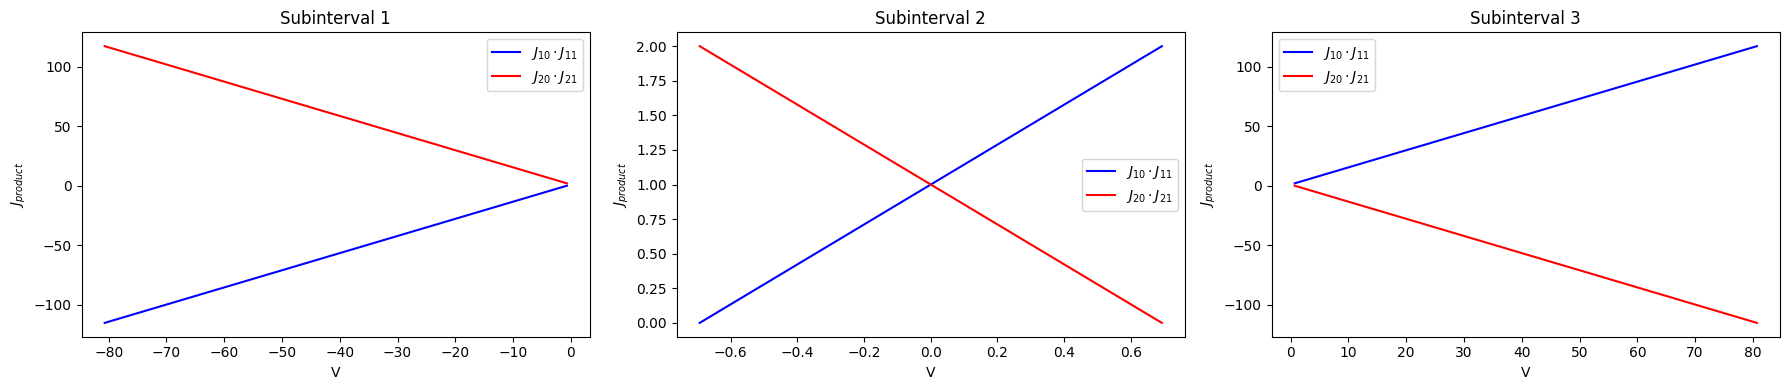

In [9]:
import numpy as np
import matplotlib.pyplot as plt

L = 2
R = 1

# Define V range
#num = 1e+10
V_range = np.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)


c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)

J1_prd2 = J10 
J2_prd2 = J20

# Find indices of zero values in J1_prd2 and J2_prd2
#zero_indices1 = np.where(J1_prd2 == 0)[0]
#zero_indices2 = np.where(J2_prd2 == 0)[0]

# Find indices of values very close to zero in J1_prd2 and J2_prd2
epsilon = 1e-3  # Adjust this value as needed
zero_indices1 = np.where(np.isclose(J1_prd2, 0, atol=epsilon))[0]
zero_indices2 = np.where(np.isclose(J2_prd2, 0, atol=epsilon))[0]

# Keep one element per consecutive sequence in zero_indices1 and zero_indices2
zero_indices1 = keep_min_abs_per_consecutive(zero_indices1, J1_prd2)
zero_indices2 = keep_min_abs_per_consecutive(zero_indices2, J2_prd2)


# Get corresponding values of t for zero values in J1_prd2 and J2_prd2
V_zero_values1 = V_range[zero_indices1]
V_zero_values2 = V_range[zero_indices2]

# Combine the zero values
V_combined = np.concatenate([V_zero_values1, V_zero_values2])

# Rearrange to have V_zero
V_zero = np.sort(V_combined)

# Find the length of V_zero
lng = len(V_zero)

# Create subintervals
#subintervals = np.split(V_zero, np.arange(1, lng))

# Create subintervals using np.linspace
if len(V_zero) > 0:
  subintervals = [
                 np.linspace(V_zero[0]-80, V_zero[0], 200)
               ] + [
                 np.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
               ] + [
                 np.linspace(V_zero[-1], V_zero[-1]+80, 200)
               ]
else:
    subintervals = [V_range[0], V_range[-1]]

# Check the signs of J1_prd2 and J2_prd2 at the midpoints of subintervals
midpoints = [np.mean(interval) for interval in subintervals]
signs_J1_prd2 = np.sign(J10)
signs_J2_prd2 = np.sign(J20)

# Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
new_V_zero = [V_zero[0]]
for i in range(1, len(V_zero) - 1):
    idx = np.searchsorted(midpoints, V_zero[i])
    if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
        new_V_zero.append(V_zero[i])
new_V_zero.append(V_zero[-1])

# Update V_zero
V_zero = np.array(new_V_zero)

# Update the length of V_zero
lng = len(V_zero)

# Create new subintervals using np.linspace
if len(V_zero) > 0:
  subintervals = [
                 np.linspace(V_zero[0]-80, V_zero[0], 200)
               ] + [
                 np.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
               ] + [
                 np.linspace(V_zero[-1], V_zero[-1]+80, 200)
               ]
else:
    subintervals = [V_range[0], V_range[-1]]


# Plot J1_prd2 and J2_prd2 on subintervals
fig, axs = plt.subplots(1, lng + 1, figsize=(18, 4))


for i, interval in enumerate(subintervals):
    start_point = interval[0]
    end_point = interval[-1]
    interval_range = np.linspace(start_point, end_point, 200)
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)
    c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(interval_range, alpha, beta, L, R, z1, z2)
    J1_prd22 = J10
    J2_prd22 = J20

    axs[i].plot(interval_range, J1_prd22, color='blue', label=f'$J_{{10}} \cdot J_{{11}} $')
    axs[i].plot(interval_range, J2_prd22, color='red', label=f'$J_{{20}} \cdot J_{{21}} $')
    axs[i].set_title(f'Subinterval {i + 1}')
    axs[i].set_xlabel('V')
    axs[i].set_ylabel('$J_{product}$')
    axs[i].legend()



# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for L and R
L_values = np.linspace(0.05, 1.95, 10)
#L_values = [0.05,  0.95, 1.05,  2]
R = 1

# Initialize matrices for signs_J1 and signs_J2
lenL = len(L_values)
num_subintervals = 50  

signs_J1 = np.zeros((lenL, num_subintervals))
signs_J2 = np.zeros((lenL, num_subintervals))
V_critic = np.zeros((lenL, num_subintervals))

for i, L in enumerate(L_values):
  V_range = np.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
  alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)


  c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
  c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
  c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
  J1_prd2 = J10 
  J2_prd2 = J20 

  # Find indices of values very close to zero in J1_prd2 and J2_prd2
  epsilon = 1e-3  # Adjust this value as needed
  zero_indices1 = np.where(np.abs(J1_prd2) <  epsilon)[0]
  zero_indices2 = np.where(np.abs(J2_prd2) <  epsilon)[0]


  # Keep one element per consecutive sequence in zero_indices1 and zero_indices2
  zero_indices1 = keep_min_abs_per_consecutive(zero_indices1, J1_prd2)
  zero_indices2 = keep_min_abs_per_consecutive(zero_indices2, J2_prd2)


  # Get corresponding values of V_range for zero values in J1_prd2 and J2_prd2
  V_zero_values1 = V_range[zero_indices1]
  V_zero_values2 = V_range[zero_indices2]
  print('V1=', V_zero_values1)
  print('V2=', V_zero_values2)

  # Combine the zero values
  V_combined = np.concatenate([V_zero_values1, V_zero_values2])

  # Rearrange to have V_zero
  V_zero = np.sort(V_combined)
  
  # Remove close values in V_combined
  V_zero = remove_close_values(V_zero)
  print('V_zero_new:', V_zero)

  # Find the length of V_zero
  lng = len(V_zero)

  # Create subintervals
  if len(V_zero) > 0:
    subintervals = [
                  np.linspace(V_zero[0]-80, V_zero[0], num_subintervals)
                ] + [
                  np.linspace(V_zero[i], V_zero[i + 1], num_subintervals) for i in range(lng - 1)
                ] + [
                  np.linspace(V_zero[-1], V_zero[-1]+80, num_subintervals)
                ]
  else:
      subintervals = [V_range[0], V_range[-1]]
  # Check the signs of J1_prd2 and J2_prd2 at the midpoints of subintervals
  midpoints = [np.mean(interval) for interval in subintervals]
  signs_J1_prd2 = np.sign(J10 )
  signs_J2_prd2 = np.sign(J20 )

  # Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
  new_V_zero = [V_zero[0]]
  for s in range(1, len(V_zero) - 1):
      idx = np.searchsorted(midpoints, V_zero[s])
      if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
          new_V_zero.append(V_zero[s])
  new_V_zero.append(V_zero[-1])

  # Update V_zero
  V_zero = np.array(new_V_zero)

  # Update the length of V_zero
  lng = len(V_zero)

  # Create new subintervals using np.linspace
  if len(V_zero) > 0:
    subintervals = [
                  np.linspace(V_zero[0]-80, V_zero[0], num_subintervals)
                ] + [
                  np.linspace(V_zero[i], V_zero[i + 1], num_subintervals) for i in range(lng - 1)
                ] + [
                  np.linspace(V_zero[-1], V_zero[-1]+80, num_subintervals)
                ]
  else:
      subintervals = [V_range[0], V_range[-1]]

  
  signs_J1_temp = np.zeros(num_subintervals)
  signs_J2_temp = np.zeros(num_subintervals)

  for k, interval in enumerate(subintervals):
      start_point = interval[0]
      end_point = interval[-1]
      interval_range = np.linspace(start_point, end_point, num_subintervals)
      c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
      c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)
      c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(interval_range, alpha, beta, L, R, z1, z2)
      J1_prd22 = J10 
      J2_prd22 = J20 

      midpoint = (start_point + end_point) / 2
      # Find the index in interval_range closest to the midpoint
      mid_index = np.abs(interval_range - midpoint).argmin()

      #mid_value = interval_range[midpoint_index]

      # Append the signs for the current L
      sign_J1_prd22 = np.sign(J1_prd22[mid_index])
      sign_J2_prd22 = np.sign(J2_prd22[mid_index])


      # Append the signs for the current L to the temporary arrays
      signs_J1_temp[k] = 1 if sign_J1_prd22 > 0 else -1
      signs_J2_temp[k] = 1 if sign_J2_prd22 > 0 else -1

  # Assign the temporary arrays to the i-th row of signs_J1 and signs_J2
  signs_J1[i, :] = signs_J1_temp
  signs_J2[i, :] = signs_J2_temp
  V_critic[i, :lng] = V_zero




V1= [2.9957503]
V2= [-2.9957503]
V_zero_new: [-2.9957503  2.9957503]
V1= [1.34285013]
V2= [-1.34285013]
V_zero_new: [-1.34285013  1.34285013]
V1= [0.75035008]
V2= [-0.75035008]
V_zero_new: [-0.75035008  0.75035008]
V1= [0.38075004]
V2= [-0.38075004]
V_zero_new: [-0.38075004  0.38075004]
V1= [0.11155001]
V2= [-0.11155001]
V_zero_new: [-0.11155001  0.11155001]
V1= [-0.10035001]
V2= [0.10035001]
V_zero_new: [-0.10035001  0.10035001]
V1= [-0.27515003]
V2= [0.27515003]
V_zero_new: [-0.27515003  0.27515003]
V1= [-0.42385004]
V2= [0.42385004]
V_zero_new: [-0.42385004  0.42385004]
V1= [-0.55325006]
V2= [0.55325006]
V_zero_new: [-0.55325006  0.55325006]
V1= [-0.66785007]
V2= [0.66785007]
V_zero_new: [-0.66785007  0.66785007]


In [11]:
ch = 0
print(signs_J1.shape)
print(signs_J1[ch,:])
print(V_critic.shape)
print(V_critic[ch,:])
#print(len(V_critic))
#lenL

(10, 50)
[-1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(10, 50)
[-2.9957503  2.9957503  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.       ]


In [12]:
# Create a matrix to store the heatmap values
Jsign_func1 = np.zeros((lenL, len(V_range)))
for i in range(len(V_critic)):
    left_index = np.searchsorted(V_range,V_critic[i, 0])
    #print(V_range[left_index])
    #print('left=',left_index)
    Jsign_func1[i, :left_index] = signs_J1[i, 0]
    
    for j in range(len(V_critic[i]) - 1):
        if (V_critic[i, j] == 0 and V_critic[i, j+1] == 0) :
            break
            
        elif (V_critic[i, j] != 0 and V_critic[i, j+1] == 0) :
            right_index = np.searchsorted(V_range,V_critic[i, j])
            #print('right=',left_index)
            Jsign_func1[i, right_index:] = signs_J1[i, j+1]

        # Find the indices corresponding to the current segment
        else:
            start_index = np.searchsorted(V_range, V_critic[i, j])
            end_index = np.searchsorted(V_range, V_critic[i, j + 1])
            # Assign values from S to the corresponding segment in H
            Jsign_func1[i, start_index:end_index] = signs_J1[i, j + 1]
        



In [13]:

# Create a matrix to store the heatmap values
Jsign_func2 = np.zeros((lenL, len(V_range)))
for i in range(len(V_critic)):
    left_index = np.searchsorted(V_range,V_critic[i, 0])
    Jsign_func2[i, :left_index] = signs_J2[i, 0]
    for j in range(len(V_critic[i]) - 1):
        if (V_critic[i, j] == 0 and V_critic[i, j+1] == 0) :
            break
            
        elif (V_critic[i, j] != 0 and V_critic[i, j+1] == 0) :
            right_index = np.searchsorted(V_range,V_critic[i, j])
            Jsign_func2[i, right_index:] = signs_J2[i, j+1]

        # Find the indices corresponding to the current segment
        else:
            start_index = np.searchsorted(V_range, V_critic[i, j])
            end_index = np.searchsorted(V_range, V_critic[i, j + 1])
            # Assign values from S to the corresponding segment in H
            Jsign_func2[i, start_index:end_index] = signs_J2[i, j + 1]

/opt/conda/lib/python3.10/site-packages/matplotlib/image.py:175: UserWarning: Data with more than 2**23 columns cannot be accurately displayed. Downsampling to less than 2**23 columns before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**23 columns'))


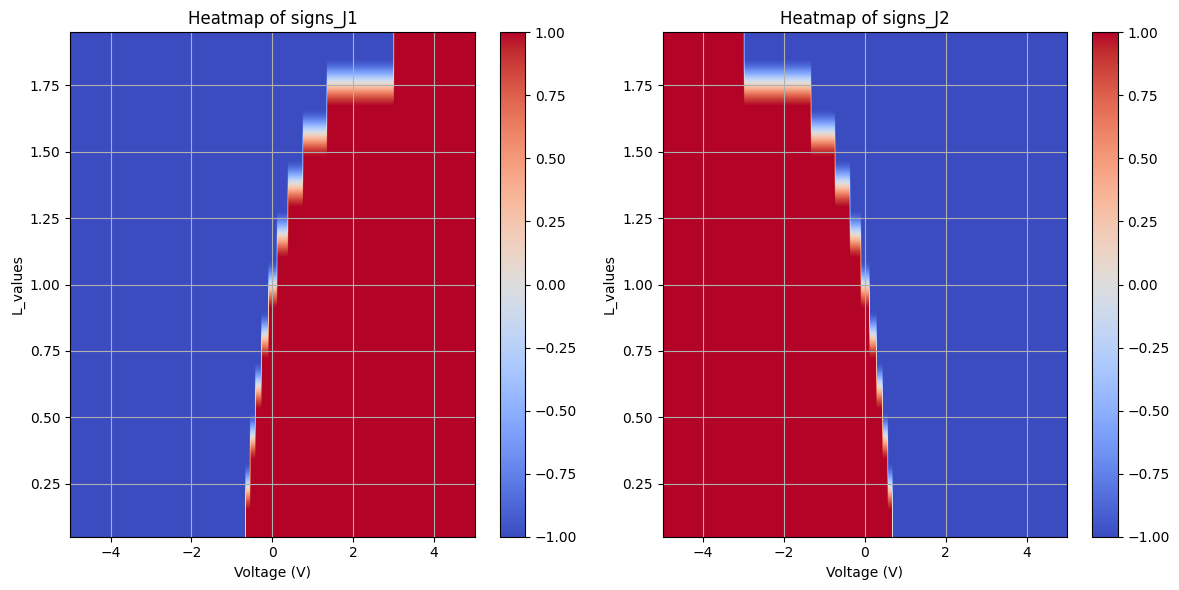

In [14]:
import matplotlib.pyplot as plt

# Assuming Jsign_func2 is already defined

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the heatmap for signs_J1
img1 = axs[0].imshow(Jsign_func1, cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[0], L_values[-1]], aspect='auto', vmin=-1, vmax=1)
axs[0].set_xlabel('Voltage (V)')
axs[0].set_ylabel('L_values')
axs[0].set_title('Heatmap of signs_J1')
axs[0].set_xlim(-5, 5)
axs[0].grid(True)

# Plot the heatmap for signs_J2
img2 = axs[1].imshow(Jsign_func2, cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[0], L_values[-1]], aspect='auto', vmin=-1, vmax=1)
axs[1].set_xlabel('Voltage (V)')
axs[1].set_ylabel('L_values')
axs[1].set_title('Heatmap of signs_J2')
axs[1].set_xlim(-5, 5)
axs[1].grid(True)

# Add legends
fig.colorbar(img1, ax=axs[0])
fig.colorbar(img2, ax=axs[1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [15]:
# Create a 3D matrix to store both signs_J1 and signs_J2
Jsign_matrix = np.zeros((2, lenL, len(V_range)))

# Define a list for both signs_J1 and signs_J2
sign_matrices = [signs_J1, signs_J2]

for idx, signs in enumerate(sign_matrices):
    for i in range(len(V_critic)):
        left_index = np.searchsorted(V_range, V_critic[i, 0])
        Jsign_matrix[idx, i, :left_index] = signs[i, 0]
        for j in range(len(V_critic[i]) - 1):
            if V_critic[i, j] == 0 and V_critic[i, j + 1] == 0:
                break
            # Find the indices corresponding to the current segment
            elif V_critic[i, j] != 0 and V_critic[i, j + 1] == 0:
                right_index = np.searchsorted(V_range, V_critic[i, j])
                Jsign_matrix[idx, i, right_index:] = signs[i, j + 1]
                
            else: 
                start_index = np.searchsorted(V_range, V_critic[i, j])
                end_index = np.searchsorted(V_range, V_critic[i, j + 1])

                # Assign values from S to the corresponding segment in H
                Jsign_matrix[idx, i, start_index:end_index] = signs[i, j + 1]




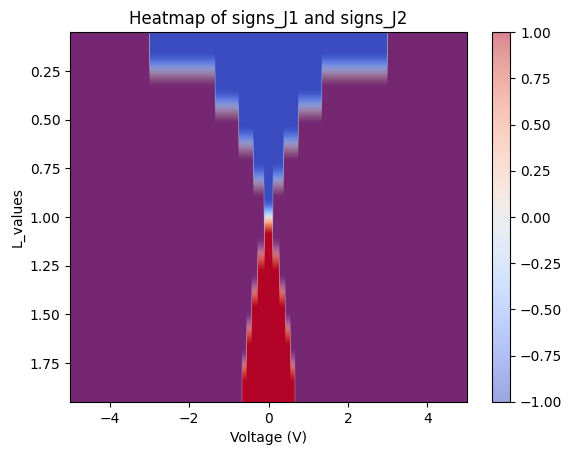

In [16]:
# Plot the heatmap with specified color scale limits for both signs_J1 and signs_J2
plt.imshow(Jsign_matrix[0, :, :], cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1)
plt.imshow(Jsign_matrix[1, :, :], cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1, alpha=0.5)  # Alpha blends the two heatmaps
plt.xlabel('Voltage (V)')
plt.ylabel('L_values')
plt.title('Heatmap of signs_J1 and signs_J2')
plt.colorbar()

# Set x-axis limits
plt.xlim(-5, 5)

plt.show()



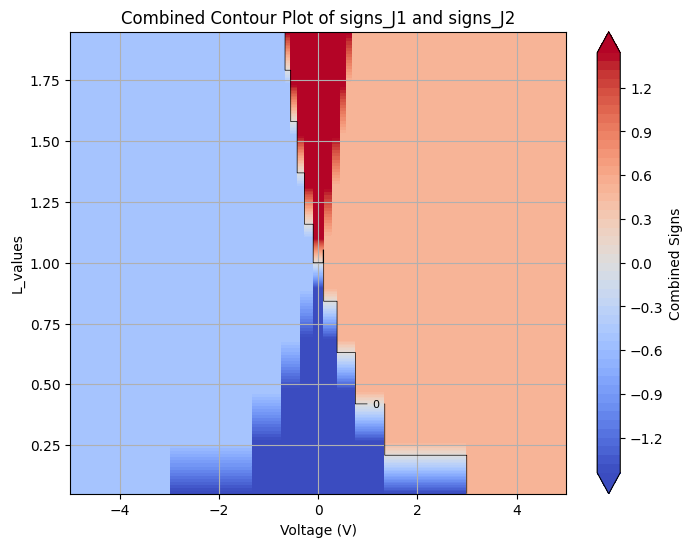

In [17]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the combined filled contour plot for signs_J1 and signs_J2
combined_heatmap = Jsign_matrix[0, :, :] + 0.5 * Jsign_matrix[1, :, :]
contour = ax.contourf(V_range, L_values, combined_heatmap, cmap='coolwarm', levels=50, extend='both')

# Set labels and title
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('L_values')
ax.set_title('Combined Contour Plot of signs_J1 and signs_J2')
ax.set_xlim(-5, 5)
ax.grid(True)

# Add colorbar
cbar = fig.colorbar(contour, ax=ax, label='Combined Signs')

# Add contour lines for zero values
contour_lines = ax.contour(V_range, L_values, combined_heatmap, levels=[0], colors='black', linewidths=0.5)
ax.clabel(contour_lines, inline=True, fontsize=8, fmt='%d', colors='black')

# Show the plot
plt.show()
